In [1]:
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdDeprotect import Deprotect
from rdkit.Chem import Draw

# List of files

In [5]:
template_path = '/home/seongok/works/practice/small_molecule_tutorial/data/rxn_gen_template.csv'
df_template = pd.read_csv(template_path)
df_template

,Rxn,Product,Template
0,PrimaryAmine+ArylHalide,Amine,"[C,c:1]-[NX3;H2,H1;!$(NC=O)].[Cl,Br,I]-[c:2]>>..."
1,SecondaryAmine+ArylHalide,Amine,"[C,c:1]-[NX3;H2,H1;!$(NC=O)]-[*:3].[Cl,Br,I]-[..."
2,PrimaryAmine+AlkylHalide,Amine,"[C,c:1]-[NX3;H2,H1;!$(NC=O)].[Cl,Br,I]-[C:2]>>..."
3,SecondaryAmine+AlkylHalide,Amine,"[C,c:1]-[NX3;H2,H1;!$(NC=O)]-[*:3].[Cl,Br,I]-[..."
4,PrimaryAmine+Aldehyde,Amine,"[C,c:1]-[NX3;H2,H1;!$(NC=O)].[CX3](=[OX1])-[*:..."
5,SecondaryAmine+Aldehyde,Amine,"[C,c:1]-[NX3;H2,H1;!$(NC=O)]-[*:3].[CX3](=[OX1..."
6,PrimaryAmine+CarboxylicAcid,Amide,"[C,c:1]-[NX3;H2,H1;!$(NC=O)].O-[CX3](=[OX1])-[..."
7,SecondaryAmine+CarboxylicAcid,Amide,"[C,c:1]-[NX3;H2,H1;!$(NC=O)]-[*:3].O-[CX3](=[O..."
8,PrimaryAmine+AcylHalide,Amide,"[C,c:1]-[NX3;H2,H1;!$(NC=O)].[Cl,Br,I]-[CX3](=..."
9,SecondaryAmine+AcylHalide,Amide,"[C,c:1]-[NX3;H2,H1;!$(NC=O)]-[*:3].[Cl,Br,I]-[..."


In [7]:
#bb: building block
bb_list_path = '/home/seongok/works/practice/small_molecule_tutorial/data/rxn_building_block.csv'
df_bb_list = pd.read_csv(bb_list_path)
df_bb_list

,Name,Category
0,PrimaryAmines,Amine
1,SecondaryAmines,Amine
2,ArylHalides,ArylHalide
3,AlkylHalides,AlkylHalide
4,AcylHalides,AcylHalide
5,Alcohols,Alcohol
6,Aldehydes,Aldehyde
7,Heteroaromatic_Aldehydes,Aldehyde
8,Boronics,Boronics
9,CarboxylicAcids,CarboxylicAcid


In [8]:
# Example BB data
bb_type = 'PrimaryAmine'
df_bb = pd.read_csv('/home/seongok/works/practice/small_molecule_tutorial/data/'+bb_type+'.csv')
df_bb

,ID,SMILES,Scaffold
0,EN300-27425,Nc1cccc(C#Cc2ccccn2)c1,0
1,EN300-26967,C#Cc1cccc(N)c1,1
2,EN300-49078,C#Cc1cccc(NC(=O)CN)c1,1
3,EN300-44922,C#CCNC(=O)c1ccccc1N,1
4,EN300-61422,C#CCn1cnc(-c2ccccc2)c1N,1
...,...,...,...
43814,EN300-51815427,C[C@@H](CCN)c1ccccc1,0
43815,EN300-51815821,N[C@@H]1CC[C@]2(C1)NC(=O)NC2=O,0
43816,EN300-51816247,C[C@@H]1C[C@@]1(F)CN,0
43817,EN300-51816365,COc1nc(C)c(Cl)c(C)c1CN,0


# Reaction template 

In [13]:
row = df_template.iloc[0]
rxn_, product_, template_ = row['Rxn'], row['Product'], row['Template']
rxn_, product_, template_

('PrimaryAmine+ArylHalide',
 'Amine',
 '[C,c:1]-[NX3;H2,H1;!$(NC=O)].[Cl,Br,I]-[c:2]>>[C,c:1]-[NX3]-[c:2]')

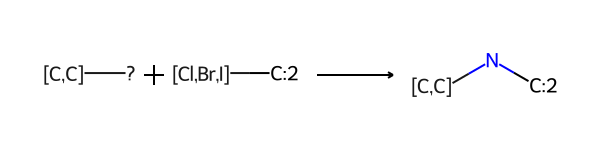

In [15]:
rxn_ = AllChem.ReactionFromSmarts(template_)
rxn_

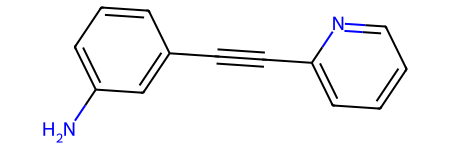

In [17]:
smi_bb1 = 'Nc1cccc(C#Cc2ccccn2)c1'
mol_bb1 = Chem.MolFromSmiles(smi_bb1)
mol_bb1

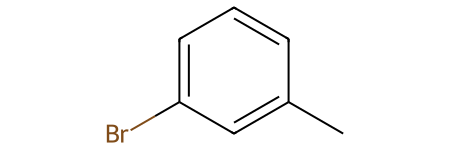

In [21]:
smi_bb2 = 'Cc1cc(Br)ccc1'
mol_bb2 = Chem.MolFromSmiles(smi_bb2)
mol_bb2

In [22]:
products = rxn_.RunReactants((mol_bb1, mol_bb2))
products

((<rdkit.Chem.rdchem.Mol at 0x14b32342bc30>,),)

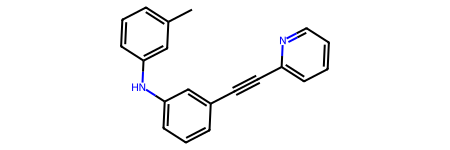

In [23]:
products[0][0]

In [16]:
def run_substitution(rxn, reactants):
    product_list = []
    try:
        products = rxn.RunReactants(reactants)
        for product in products:
            smi_ = Chem.MolToSmiles(product[0])
            if smi_ not in product_list:
                product_list.append(smi_)
    except:
        print ("ERROR")
    return product_list

In [27]:
result = run_substitution(rxn_, (mol_bb1, mol_bb2))
result

['Cc1cccc(Nc2cccc(C#Cc3ccccn3)c2)c1']

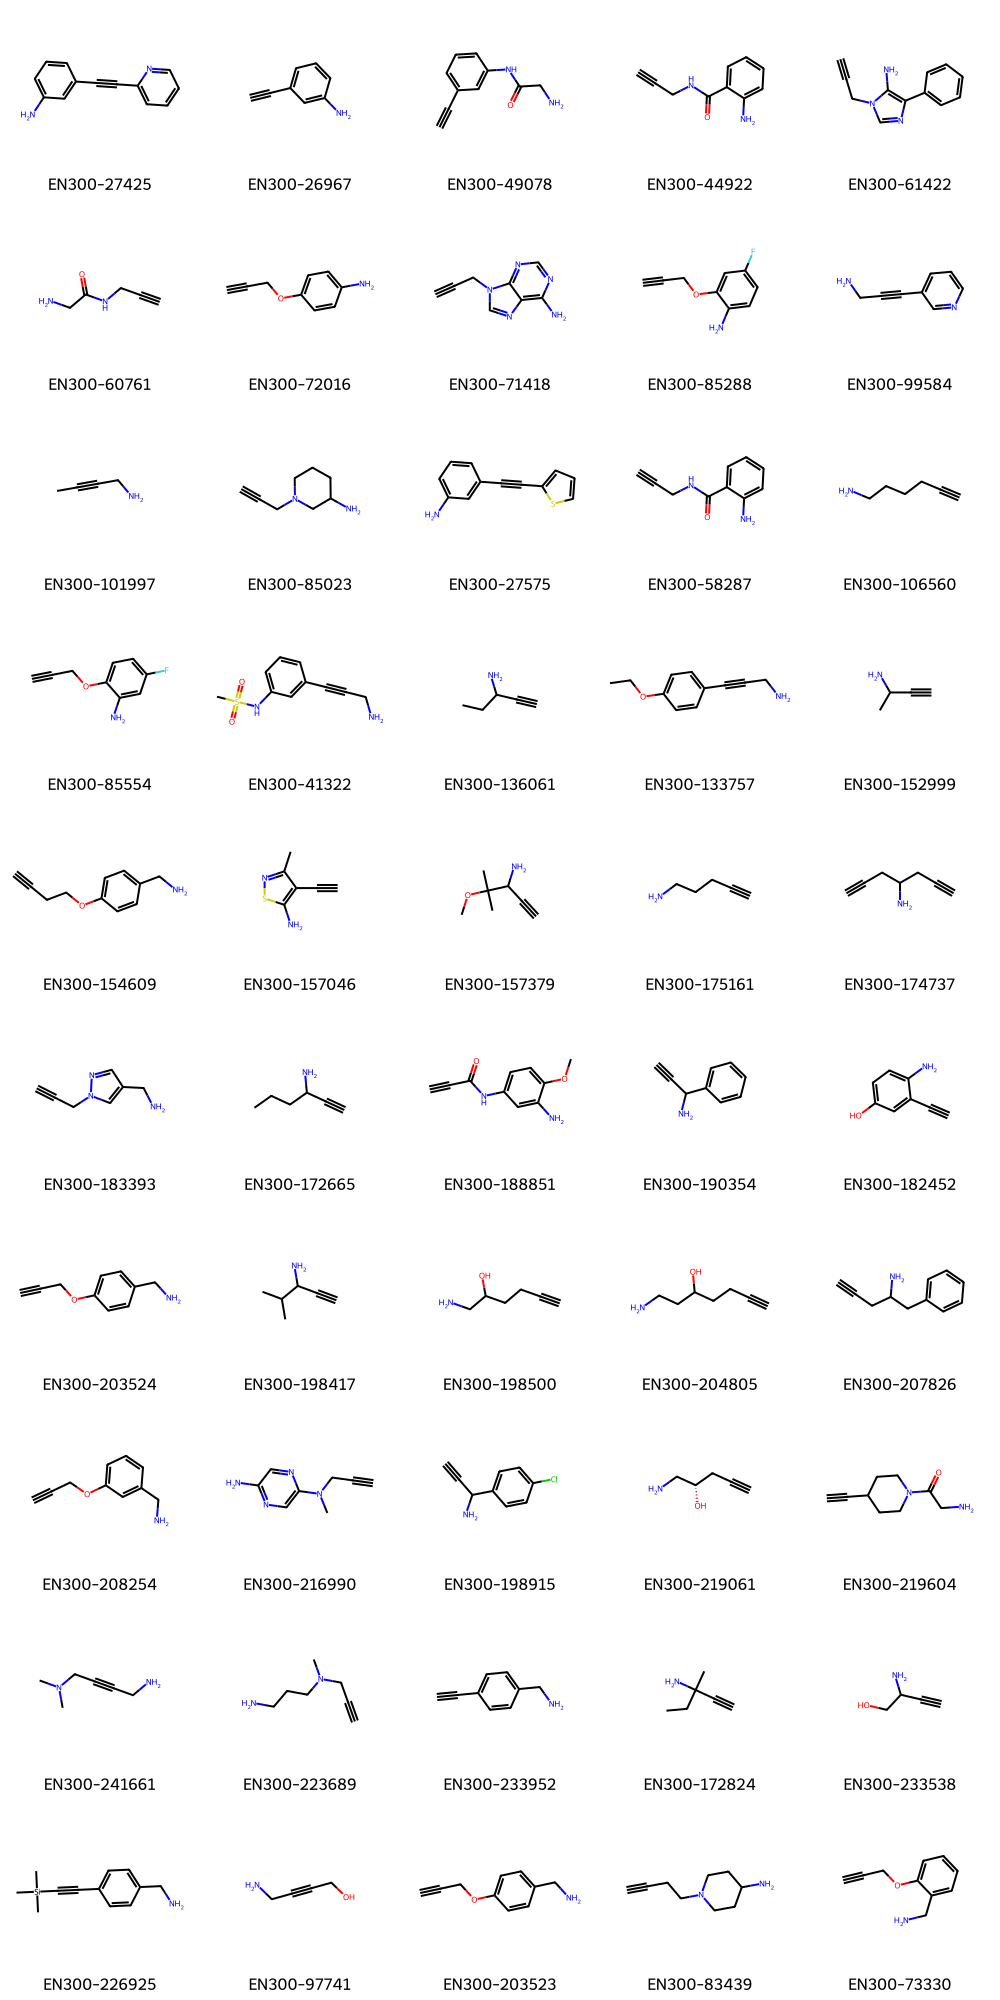

In [26]:
smi_bb_list = list(df_bb['SMILES'])[:50] # only 50 building blocks
id_bb_list = list(df_bb['ID'])[:50]
mol_bb_list = [Chem.MolFromSmiles(smi) for smi in smi_bb_list]
Draw.MolsToGridImage(mol_bb_list, molsPerRow=5, legends=id_bb_list)

In [30]:
smi_product_list = []
for mol_bb in mol_bb_list:
    smi_product = run_substitution(rxn_, (mol_bb, mol_bb2))
    smi_product_list.append(smi_product[0])
smi_product_list

['Cc1cccc(Nc2cccc(C#Cc3ccccn3)c2)c1',
 'C#Cc1cccc(Nc2cccc(C)c2)c1',
 'C#Cc1cccc(NC(=O)CNc2cccc(C)c2)c1',
 'C#CCNC(=O)c1ccccc1Nc1cccc(C)c1',
 'C#CCn1cnc(-c2ccccc2)c1Nc1cccc(C)c1',
 'C#CCNC(=O)CNc1cccc(C)c1',
 'C#CCOc1ccc(Nc2cccc(C)c2)cc1',
 'C#CCn1cnc2c(Nc3cccc(C)c3)ncnc21',
 'C#CCOc1cc(F)ccc1Nc1cccc(C)c1',
 'Cc1cccc(NCC#Cc2cccnc2)c1',
 'CC#CCNc1cccc(C)c1',
 'C#CCN1CCCC(Nc2cccc(C)c2)C1',
 'Cc1cccc(Nc2cccc(C#Cc3cccs3)c2)c1',
 'C#CCNC(=O)c1ccccc1Nc1cccc(C)c1',
 'C#CCCCCNc1cccc(C)c1',
 'C#CCOc1ccc(F)cc1Nc1cccc(C)c1',
 'Cc1cccc(Nc2cccc(C#CCN)c2)c1',
 'C#CC(CC)Nc1cccc(C)c1',
 'CCOc1ccc(C#CCNc2cccc(C)c2)cc1',
 'C#CC(C)Nc1cccc(C)c1',
 'C#CCCOc1ccc(CNc2cccc(C)c2)cc1',
 'C#Cc1c(C)nsc1Nc1cccc(C)c1',
 'C#CC(Nc1cccc(C)c1)C(C)(C)OC',
 'C#CCCCNc1cccc(C)c1',
 'C#CCC(CC#C)Nc1cccc(C)c1',
 'C#CCn1cc(CNc2cccc(C)c2)cn1',
 'C#CC(CCC)Nc1cccc(C)c1',
 'C#CC(=O)Nc1ccc(OC)c(Nc2cccc(C)c2)c1',
 'C#CC(Nc1cccc(C)c1)c1ccccc1',
 'C#Cc1cc(O)ccc1Nc1cccc(C)c1',
 'C#CCOc1ccc(CNc2cccc(C)c2)cc1',
 'C#CC(Nc1cccc(C)c1)C(C)C',

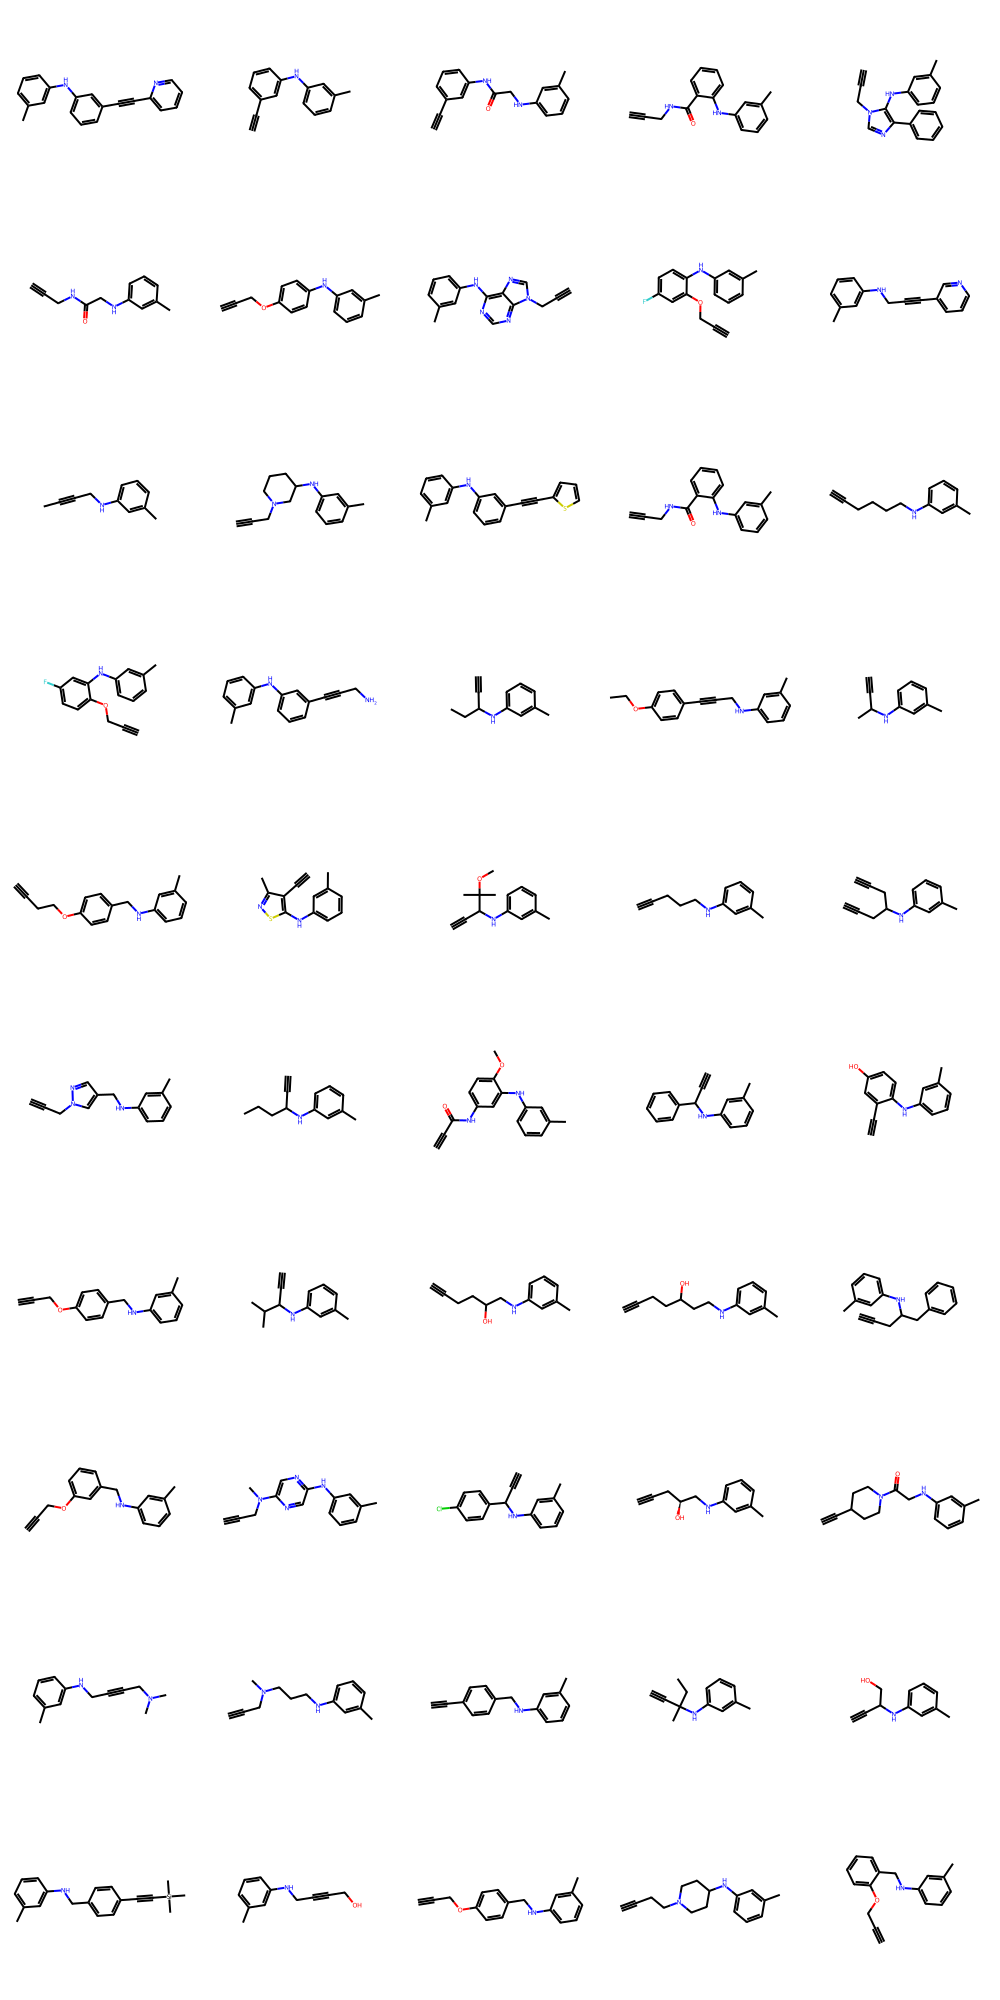

In [31]:
mol_product_list = [Chem.MolFromSmiles(smi) for smi in smi_product_list]
Draw.MolsToGridImage(mol_product_list, molsPerRow=5)